<a href="https://colab.research.google.com/github/Rdeandres/Neural-Networks-Deep-Learning/blob/master/REgression_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get data, setup enviroment

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set()

# For modelling
!pip install -q dython
from dython import nominal

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder




import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Where to save the figures
#PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "end_to_end_project"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
#os.makedirs(IMAGES_PATH, exist_ok=True)

#def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    #path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    #print("Saving figure", fig_id)
    #if tight_layout:
        #plt.tight_layout()
    #plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd 
#df = pd.read_csv('/content/df3.csv')
df = pd.read_csv('/content/df (3).csv')
df.columns.str.replace(' ','')
df.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,prescription_total_03,prescription_total_06,prescription_total_09,prescription_total_12,webinar_total_01,webinar_total_02,webinar_total_03,webinar_total_04,webinar_total_05,webinar_total_06,webinar_total_07,webinar_total_08,webinar_total_09,webinar_total_10,webinar_total_11,webinar_total_12,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,webinar,prescription,f2f,email_open,conference,webinar3,webinar3_bin,webinar6,webinar6_bin,webinar9,webinar9_bin,webinar12,webinar12_bin,conference3_bin,conference6_bin,conference9_bin,conference12_bin,f2f3_bin,...,email_open3_bin,email_open6_bin,email_open9_bin,email_open12_bin,interaction3_bin,interaction3,interaction6_bin,interaction6,interaction9_bin,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,nb_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Vol_interac_12,quantile_eng,Engagement_group,dig_interaction_tot_bin,dig_interaction_tot,interaction_tot_bin,interaction_tot,customer_id_y,Rep_class,Class_Presciption,Class_exp_doc
0,0,0,3,0,0,0,0,0,0,0,2,2,3,1,1,0,0,Office,False,False,True,23.0,9,3,70,10,2,0,0,2,1,6,1,5,1,0,1,1,1,1,...,1,1,1,1,1,11,1,28,1,28,1,35,1,1,1,5,1,7,1,8,128,64,32,8,560,224,112,11,1139,560,"(974.0, 1861.0]",1.Engaged,False,21,False,102,91,1.big,medium,3.medium high
1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,Office,True,False,True,27.0,0,2,8,15,2,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,1,3,1,11,1,5,1,6,1,2,1,6,1,2,1,4,96,48,24,8,96,40,44,3,359,96,"(356.0, 361.0]",2.Average,False,14,False,25,78,2.medium big,small,3.medium high
2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Hospital,False,False,True,22.0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,2,1,1,0,0,0,0,1,2,1,1,32,16,0,0,16,16,0,0,80,16,"(24.0, 102.0]",3.cold,False,3,False,3,360,1.big,small,3.medium high
3,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,Office,True,False,True,27.0,0,4,55,16,2,0,0,0,0,0,0,0,0,1,0,0,0,1,...,1,1,1,1,1,10,1,21,1,23,1,22,1,1,1,6,1,4,1,4,64,32,16,12,352,184,84,10,754,352,"(742.0, 782.0]",1.Engaged,False,15,False,76,33,3.medium small,medium,3.medium high
4,4,0,2,3,0,0,0,1,1,1,0,0,0,0,0,0,0,Office,False,False,True,44.0,3,5,35,12,0,1,1,2,1,0,0,0,0,0,0,0,0,1,...,1,0,1,1,1,13,1,13,1,13,1,11,1,6,1,2,1,3,1,2,64,32,16,12,176,104,52,13,469,176,"(467.0, 473.0]",2.Average,False,13,False,50,91,1.big,medium,5.super high


In [2]:
df.info

<bound method DataFrame.info of       Unnamed: 0  prescription_total_03  ...  Class_Presciption  Class_exp_doc
0              0                      0  ...             medium  3.medium high
1              1                      0  ...              small  3.medium high
2              2                      1  ...              small  3.medium high
3              3                      0  ...             medium  3.medium high
4              4                      0  ...             medium   5.super high
...          ...                    ...  ...                ...            ...
8333        8333                      1  ...                big   2.medium low
8334        8334                      0  ...              small       1.little
8335        8335                      0  ...             medium   2.medium low
8336        8336                      0  ...                big  3.medium high
8337        8337                      0  ...              small       1.little

[8338 rows x 83 col

In [4]:
t = pd.read_csv('/content/data.csv')
t.columns.str.replace(' ','')
t["f2f3"]= t["f2f_total_01"] + t["f2f_total_02"] + t["f2f_total_03"]
t['f2f3_bin']=False
t.loc[t['f2f3'] > 0, 'f2f3_bin'] = '1'
t.loc[t['f2f3'] <= 0, 'f2f3_bin'] = '0'
t["f2f6"]= t["f2f_total_04"] + t["f2f_total_05"] + t["f2f_total_06"]
t['f2f6_bin']=False
t.loc[t['f2f6'] > 0, 'f2f6_bin'] = '1'
t.loc[t['f2f6'] <= 0, 'f2f6_bin'] = '0'
t["f2f9"]= t["f2f_total_07"] + t["f2f_total_08"] + t["f2f_total_09"]
t['f2f9_bin']=False
t.loc[t['f2f9'] > 0, 'f2f9_bin'] = '1'
t.loc[t['f2f9'] <= 0, 'f2f9_bin'] = '0'
t["f2f12"]= t["f2f_total_08"] + t["f2f_total_09"] + t["f2f_total_10"]
t['f2f12_bin']=False
t.loc[t['f2f12'] > 0, 'f2f12_bin'] = '1'
t.loc[t['f2f12'] <= 0, 'f2f12_bin'] = '0'
df = pd.concat([df,t['f2f3']] ,axis=1)
df = pd.concat([df,t['f2f6']] ,axis=1)
df = pd.concat([df,t['f2f9']] ,axis=1)
df = pd.concat([df,t['f2f12']] ,axis=1)

df.head()

,Unnamed: 0,prescription_total_03,prescription_total_06,prescription_total_09,prescription_total_12,webinar_total_01,webinar_total_02,webinar_total_03,webinar_total_04,webinar_total_05,webinar_total_06,webinar_total_07,webinar_total_08,webinar_total_09,webinar_total_10,webinar_total_11,webinar_total_12,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,webinar,prescription,f2f,email_open,conference,webinar3,webinar3_bin,webinar6,webinar6_bin,webinar9,webinar9_bin,webinar12,webinar12_bin,conference3_bin,conference6_bin,conference9_bin,conference12_bin,f2f3_bin,...,interaction9_bin,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,nb_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Vol_interac_12,quantile_eng,Engagement_group,dig_interaction_tot_bin,dig_interaction_tot,interaction_tot_bin,interaction_tot,customer_id_y,Rep_class,Class_Presciption,Class_exp_doc,f2f3,f2f6,f2f9,f2f12,f2f3,f2f6,f2f9,f2f12
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,Office,False,False,True,23.0,9.0,3.0,70.0,10.0,2.0,0.0,0.0,2.0,1.0,6.0,1.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,28.0,1.0,35.0,1.0,1.0,1.0,5.0,1.0,7.0,1.0,8.0,128.0,64.0,32.0,8.0,560.0,224.0,112.0,11.0,1139.0,560.0,"(974.0, 1861.0]",1.Engaged,False,21.0,False,102.0,91.0,1.big,medium,3.medium high,10,22,20,26,10,22,20,26
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,2.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,5.0,1.0,6.0,1.0,2.0,1.0,6.0,1.0,2.0,1.0,4.0,96.0,48.0,24.0,8.0,96.0,40.0,44.0,3.0,359.0,96.0,"(356.0, 361.0]",2.Average,False,14.0,False,25.0,78.0,2.medium big,small,3.medium high,1,4,2,1,1,4,2,1
2,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hospital,False,False,True,22.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,32.0,16.0,0.0,0.0,16.0,16.0,0.0,0.0,80.0,16.0,"(24.0, 102.0]",3.cold,False,3.0,False,3.0,360.0,1.big,small,3.medium high,4,5,14,10,4,5,14,10
3,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,4.0,55.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,23.0,1.0,22.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,4.0,64.0,32.0,16.0,12.0,352.0,184.0,84.0,10.0,754.0,352.0,"(742.0, 782.0]",1.Engaged,False,15.0,False,76.0,33.0,3.medium small,medium,3.medium high,0,0,0,0,0,0,0,0
4,4.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,False,False,True,44.0,3.0,5.0,35.0,12.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,13.0,1.0,11.0,1.0,6.0,1.0,2.0,1.0,3.0,1.0,2.0,64.0,32.0,16.0,12.0,176.0,104.0,52.0,13.0,469.0,176.0,"(467.0, 473.0]",2.Average,False,13.0,False,50.0,91.0,1.big,medium,5.super high,8,15,19,18,8,15,19,18


In [4]:
df.head()

,Unnamed: 0,prescription_total_03,prescription_total_06,prescription_total_09,prescription_total_12,webinar_total_01,webinar_total_02,webinar_total_03,webinar_total_04,webinar_total_05,webinar_total_06,webinar_total_07,webinar_total_08,webinar_total_09,webinar_total_10,webinar_total_11,webinar_total_12,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,webinar,prescription,f2f,email_open,conference,webinar3,webinar3_bin,webinar6,webinar6_bin,webinar9,webinar9_bin,webinar12,webinar12_bin,conference3_bin,conference6_bin,conference9_bin,conference12_bin,f2f3_bin,...,interaction3_bin,interaction3,interaction6_bin,interaction6,interaction9_bin,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,nb_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Vol_interac_12,quantile_eng,Engagement_group,dig_interaction_tot_bin,dig_interaction_tot,interaction_tot_bin,interaction_tot,customer_id_y,Rep_class,Class_Presciption,Class_exp_doc,f2f3,f2f6,f2f9,f2f12
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,Office,False,False,True,23.0,9.0,3.0,70.0,10.0,2.0,0.0,0.0,2.0,1.0,6.0,1.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,11.0,1.0,28.0,1.0,28.0,1.0,35.0,1.0,1.0,1.0,5.0,1.0,7.0,1.0,8.0,128.0,64.0,32.0,8.0,560.0,224.0,112.0,11.0,1139.0,560.0,"(974.0, 1861.0]",1.Engaged,False,21.0,False,102.0,91.0,1.big,medium,3.medium high,10,22,20,26
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,2.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,11.0,1.0,5.0,1.0,6.0,1.0,2.0,1.0,6.0,1.0,2.0,1.0,4.0,96.0,48.0,24.0,8.0,96.0,40.0,44.0,3.0,359.0,96.0,"(356.0, 361.0]",2.Average,False,14.0,False,25.0,78.0,2.medium big,small,3.medium high,1,4,2,1
2,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hospital,False,False,True,22.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,32.0,16.0,0.0,0.0,16.0,16.0,0.0,0.0,80.0,16.0,"(24.0, 102.0]",3.cold,False,3.0,False,3.0,360.0,1.big,small,3.medium high,4,5,14,10
3,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,4.0,55.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,10.0,1.0,21.0,1.0,23.0,1.0,22.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,4.0,64.0,32.0,16.0,12.0,352.0,184.0,84.0,10.0,754.0,352.0,"(742.0, 782.0]",1.Engaged,False,15.0,False,76.0,33.0,3.medium small,medium,3.medium high,0,0,0,0
4,4.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,False,False,True,44.0,3.0,5.0,35.0,12.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,13.0,1.0,13.0,1.0,13.0,1.0,11.0,1.0,6.0,1.0,2.0,1.0,3.0,1.0,2.0,64.0,32.0,16.0,12.0,176.0,104.0,52.0,13.0,469.0,176.0,"(467.0, 473.0]",2.Average,False,13.0,False,50.0,91.0,1.big,medium,5.super high,8,15,19,18


In [0]:
#df.to_csv('/content/df3.csv')

In [0]:
# drop rows with missing values, there are only 6 obs with missing values it's probally a mistake (tale a look at obs when I have more time)
df.dropna(inplace=True)
#Deleting outliers
df = df.drop(df[(df['prescription']>80)].index)

In [0]:
df.info()

# distribution and regression


 mu = 4.19 and sigma = 6.00



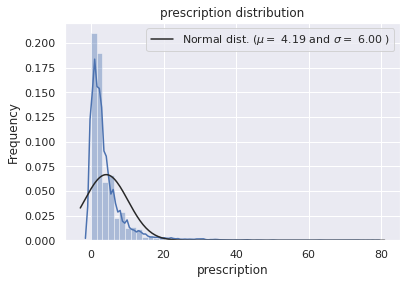

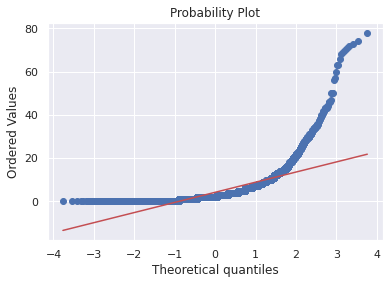

In [5]:
#Distribution of target variabe
#Check the new distribution 
sns.distplot(df['prescription'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['prescription'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('prescription distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['prescription'], plot=plt)
plt.show()


 mu = 1.24 and sigma = 0.86



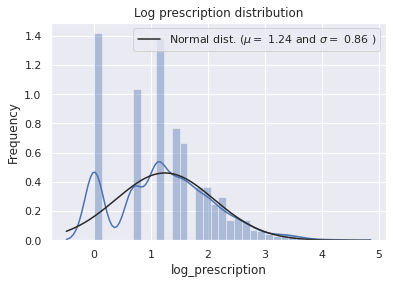

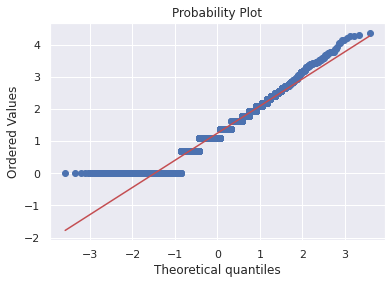

In [6]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df['log_prescription'] = np.log1p(df['prescription'])

#Check the new distribution 
sns.distplot(df['log_prescription'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['log_prescription'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Log prescription distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['log_prescription'], plot=plt)
plt.show()


In [5]:
#create feature of recency of prescription

df["recency_pres"] = '5.none'


df["recency_pres"] = '5.none'
df.loc[df['prescription_total_03'] >= 1, "recency_pres"] = '4.not_very_recent'
df.loc[df['prescription_total_06'] >= 1, "recency_pres"] = '3.even_less_recent'
df.loc[df['prescription_total_09'] >= 1, "recency_pres"] = '2.less_recent'
df.loc[df['prescription_total_12'] >= 1, "recency_pres"] = '1.recent'

df["recency_pres"].value_counts()
df.head()

,Unnamed: 0,prescription_total_03,prescription_total_06,prescription_total_09,prescription_total_12,webinar_total_01,webinar_total_02,webinar_total_03,webinar_total_04,webinar_total_05,webinar_total_06,webinar_total_07,webinar_total_08,webinar_total_09,webinar_total_10,webinar_total_11,webinar_total_12,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,webinar,prescription,f2f,email_open,conference,webinar3,webinar3_bin,webinar6,webinar6_bin,webinar9,webinar9_bin,webinar12,webinar12_bin,conference3_bin,conference6_bin,conference9_bin,conference12_bin,f2f3_bin,...,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,nb_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Vol_interac_12,quantile_eng,Engagement_group,dig_interaction_tot_bin,dig_interaction_tot,interaction_tot_bin,interaction_tot,customer_id_y,Rep_class,Class_Presciption,Class_exp_doc,f2f3,f2f6,f2f9,f2f12,f2f3,f2f6,f2f9,f2f12,recency_pres
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,Office,False,False,True,23.0,9.0,3.0,70.0,10.0,2.0,0.0,0.0,2.0,1.0,6.0,1.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,...,28.0,1.0,35.0,1.0,1.0,1.0,5.0,1.0,7.0,1.0,8.0,128.0,64.0,32.0,8.0,560.0,224.0,112.0,11.0,1139.0,560.0,"(974.0, 1861.0]",1.Engaged,False,21.0,False,102.0,91.0,1.big,medium,3.medium high,10,22,20,26,10,22,20,26,3.even_less_recent
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,2.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,5.0,1.0,6.0,1.0,2.0,1.0,6.0,1.0,2.0,1.0,4.0,96.0,48.0,24.0,8.0,96.0,40.0,44.0,3.0,359.0,96.0,"(356.0, 361.0]",2.Average,False,14.0,False,25.0,78.0,2.medium big,small,3.medium high,1,4,2,1,1,4,2,1,1.recent
2,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hospital,False,False,True,22.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,32.0,16.0,0.0,0.0,16.0,16.0,0.0,0.0,80.0,16.0,"(24.0, 102.0]",3.cold,False,3.0,False,3.0,360.0,1.big,small,3.medium high,4,5,14,10,4,5,14,10,2.less_recent
3,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,4.0,55.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,23.0,1.0,22.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,4.0,64.0,32.0,16.0,12.0,352.0,184.0,84.0,10.0,754.0,352.0,"(742.0, 782.0]",1.Engaged,False,15.0,False,76.0,33.0,3.medium small,medium,3.medium high,0,0,0,0,0,0,0,0,2.less_recent
4,4.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,False,False,True,44.0,3.0,5.0,35.0,12.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,13.0,1.0,11.0,1.0,6.0,1.0,2.0,1.0,3.0,1.0,2.0,64.0,32.0,16.0,12.0,176.0,104.0,52.0,13.0,469.0,176.0,"(467.0, 473.0]",2.Average,False,13.0,False,50.0,91.0,1.big,medium,5.super high,8,15,19,18,8,15,19,18,2.less_recent


In [6]:
cols = ['prescription_total_12', 'prescription_total_09','prescription_total_06','prescription_total_03',  'prescription',	'f2f','email_open',	'conference', 'webinar', 'office_or_hospital_based',	'gender',	'is_cardiologist', 'years_since_graduation','customer_id_y', 'Rep_class',	'Class_Presciption',	'Class_exp_doc', 'recency_pres']
f = df[cols]

f["recency_pres"] = '0.none'
f.loc[df['prescription_total_03'] >= 1, "recency_pres"] = '4.not_very_recent'
f.loc[df['prescription_total_06'] >= 1, "recency_pres"] = '3.even_less_recent'
f.loc[df['prescription_total_09'] >= 1, "recency_pres"] = '2.less_recent'
f.loc[df['prescription_total_12'] >= 1, "recency_pres"] = '1.recent'



f=f.drop(['prescription_total_12','prescription_total_09','prescription_total_06','prescription_total_03'],axis=1)

f.head()


,prescription,f2f,email_open,conference,webinar,office_or_hospital_based,gender,is_cardiologist,years_since_graduation,customer_id_y,Rep_class,Class_Presciption,Class_exp_doc,recency_pres
0,3.0,70.0,10.0,2.0,9.0,Office,False,False,23.0,91.0,1.big,medium,3.medium high,3.even_less_recent
1,2.0,8.0,15.0,2.0,0.0,Office,True,False,27.0,78.0,2.medium big,small,3.medium high,1.recent
2,2.0,0.0,3.0,0.0,0.0,Hospital,False,False,22.0,360.0,1.big,small,3.medium high,2.less_recent
3,4.0,55.0,16.0,2.0,0.0,Office,True,False,27.0,33.0,3.medium small,medium,3.medium high,2.less_recent
4,5.0,35.0,12.0,0.0,3.0,Office,False,False,44.0,91.0,1.big,medium,5.super high,2.less_recent


In [0]:
# drop rows with missing values, there are only 6 obs with missing values it's probally a mistake (tale a look at obs when I have more time)
f.dropna(inplace=True)

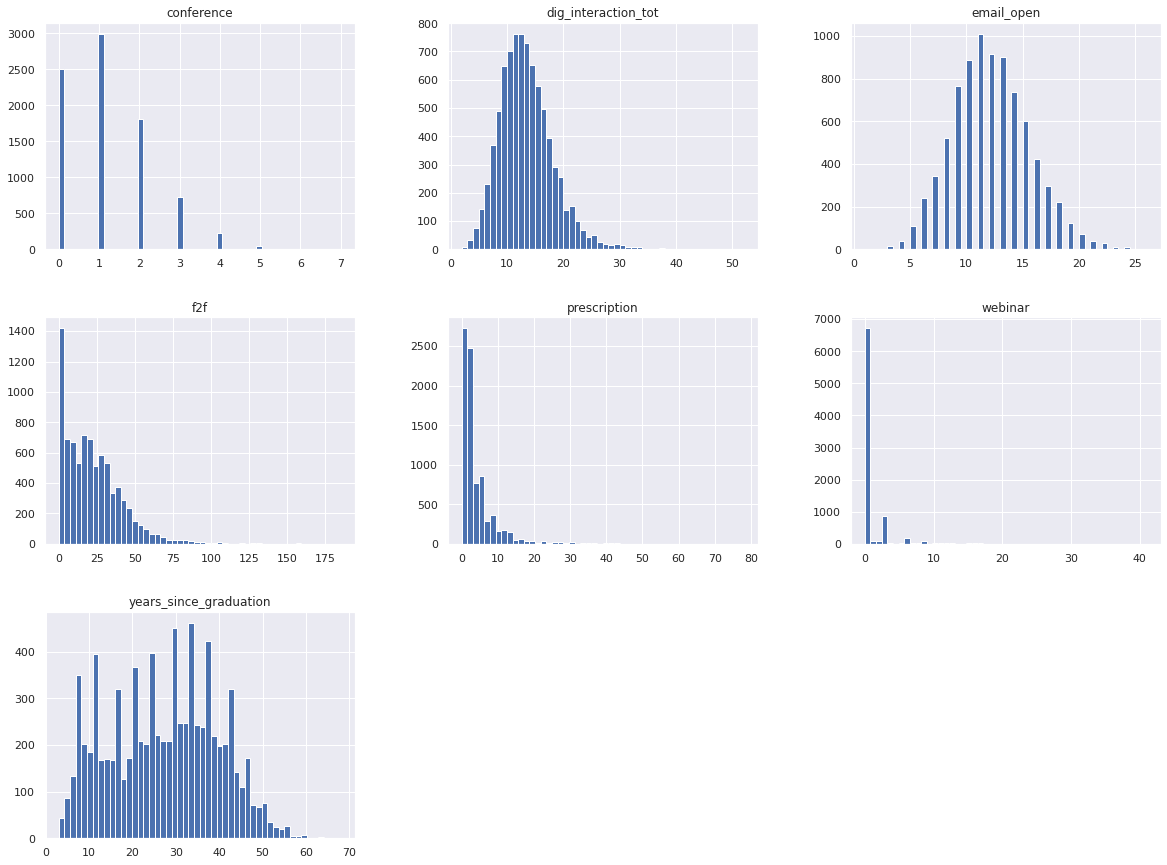

In [183]:
%matplotlib inline
import matplotlib.pyplot as plt
f.hist(bins=50, figsize=(20,15))
# pandas drop a column with drop function

plt.show()

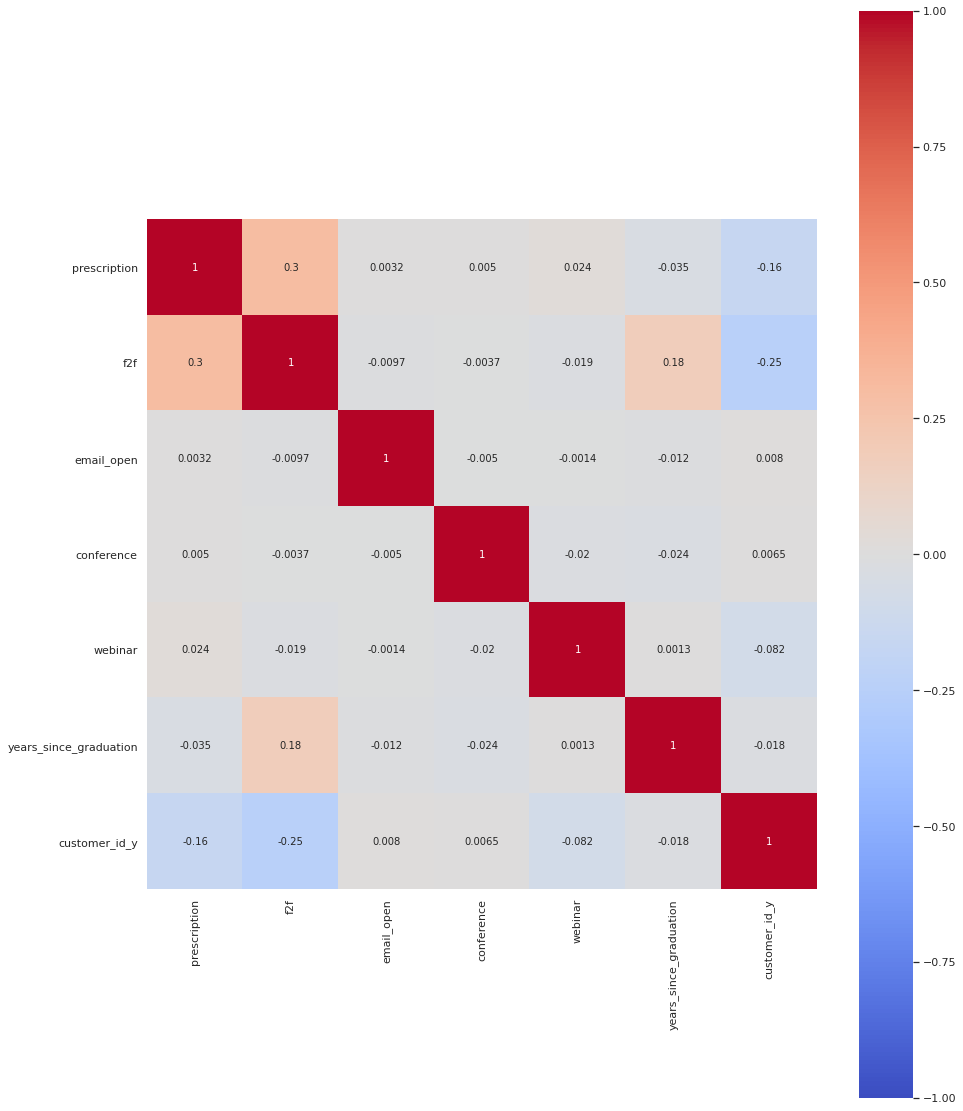

In [9]:

corrmat = f.corr()
plt.subplots(figsize=(15,20))
sns.heatmap(corrmat, square=True, vmin=-1,cmap='coolwarm',annot=True)


# engagement index:
Number of interactions per temporal window (find out and motivate the
choice of the window length)
• Consistency of the interactions (are they sparse, dense, equally distributed,
etc.?)
• Depth of the engagement (proportional to the number of different channels
employed by the sales rep with a specific customer)

In [277]:
df[["interaction_tot","dig_interaction_tot","prescription" ]].groupby(f['recency_pres']).mean()

,interaction_tot,dig_interaction_tot,prescription
recency_pres,,,
1.recent,42.448110,13.063918,7.770103
2.less_recent,37.933880,12.910383,3.961202
3.even_less_recent,37.126883,12.840603,2.731166
4.not_very_recent,37.623457,13.092593,1.980247
5.none,34.408644,12.981009,0.000000


# linear regression

In [8]:
from scipy.spatial.distance import cdist
# ACP sur les var numériques
# l'ACP doit être appliqué sur des données standardisées
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

y= np.log1p(f['prescription'])

Z = f.select_dtypes(include=[object,bool])
# prescription est plus une variable qu'on veut projetter
X = f.drop(['prescription','Class_Presciption','Rep_class','years_since_graduation'],axis=1)
#droping years because of the gap keeping class years
#Z = pd.concat([Z,df["K-means"]] ,axis=1)

X.head()

,f2f,email_open,conference,webinar,office_or_hospital_based,gender,is_cardiologist,customer_id_y,Class_exp_doc,recency_pres
0,70.0,10.0,2.0,9.0,Office,False,False,91.0,3.medium high,3.even_less_recent
1,8.0,15.0,2.0,0.0,Office,True,False,78.0,3.medium high,1.recent
2,0.0,3.0,0.0,0.0,Hospital,False,False,360.0,3.medium high,2.less_recent
3,55.0,16.0,2.0,0.0,Office,True,False,33.0,3.medium high,2.less_recent
4,35.0,12.0,0.0,3.0,Office,False,False,91.0,5.super high,2.less_recent


In [0]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# goal is to normalize as much as possible

In [10]:
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
Z = X.select_dtypes(include=[object,bool]).apply(le.fit_transform)
Z.head()

,office_or_hospital_based,gender,is_cardiologist,Class_exp_doc,recency_pres
0,1,0,0,2,3
1,1,1,0,2,1
2,0,0,0,2,2
3,1,1,0,2,2
4,1,0,0,4,2


In [11]:
X=X.drop(X.select_dtypes(include=[object,bool]),axis=1)
p=pd.concat([X,Z], axis=1)
p.head()

,f2f,email_open,conference,webinar,customer_id_y,office_or_hospital_based,gender,is_cardiologist,Class_exp_doc,recency_pres
0,70.0,10.0,2.0,9.0,91.0,1,0,0,2,3
1,8.0,15.0,2.0,0.0,78.0,1,1,0,2,1
2,0.0,3.0,0.0,0.0,360.0,0,0,0,2,2
3,55.0,16.0,2.0,0.0,33.0,1,1,0,2,2
4,35.0,12.0,0.0,3.0,91.0,1,0,0,4,2


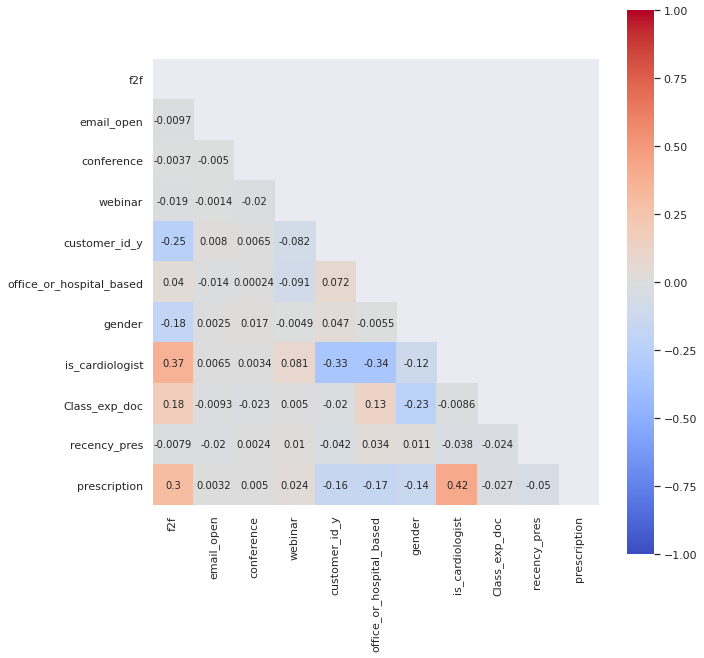

In [18]:
analysis=pd.concat([p,f['prescription']], axis=1)


corrmat = analysis.corr()
mask = np.zeros(corrmat.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(10,10))
plt.xticks(rotation = 0)
sns.heatmap(corrmat, square=True, vmin = -1, vmax = 1, center = 0,cmap='coolwarm',annot=True, mask=mask)

In [0]:
X=p

In [0]:
X_scaled = scaler.fit_transform(X)

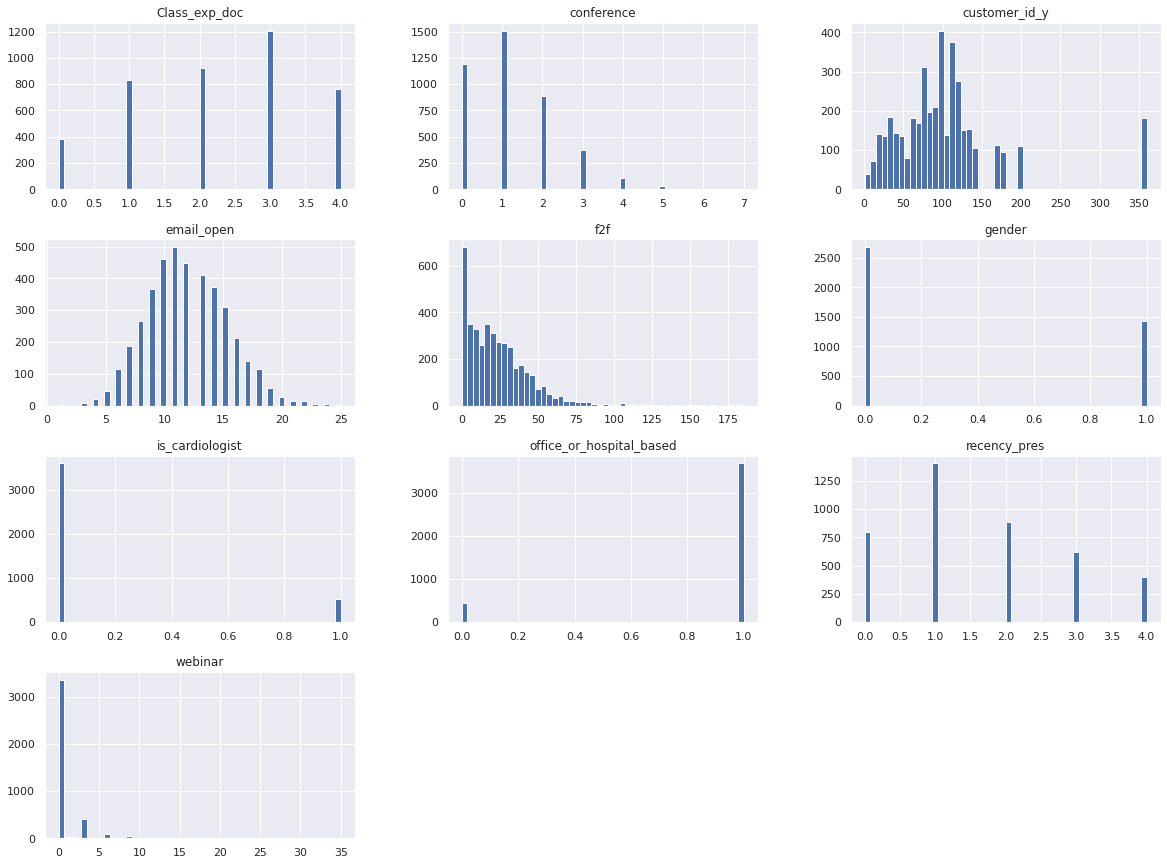

In [17]:
p.hist(bins=50, figsize=(20,15))
# pandas drop a column with drop function

plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()  
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
coeff_df = pd.DataFrame(lm.coef_, p.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
f2f,0.135957
email_open,-0.008257
conference,0.004791
webinar,-0.005211
customer_id_y,-0.038022
office_or_hospital_based,-0.063451
gender,-0.085798
is_cardiologist,0.225800
Class_exp_doc,-0.058633
recency_pres,0.180351


In [0]:
y_pred = lm.predict(X_test)

In [36]:
params = np.append(lm.intercept_,lm.coef_)
predictions = y_pred

newX = pd.DataFrame({"Constant":np.ones(len(X_test))}).join(pd.DataFrame(X))
MSE = (sum((Y_test-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0         1.2461            0.147     8.505          0.000
1         0.1360            0.001    93.159          0.000
2        -0.0083            0.007    -1.141          0.254
3         0.0048            0.023     0.209          0.834
4        -0.0052            0.007    -0.743          0.458
5        -0.0380            0.000  -105.834          0.000
6        -0.0635            0.081    -0.785          0.433
7        -0.0858            0.054    -1.579          0.115
8         0.2258            0.099     2.283          0.023
9        -0.0586            0.021    -2.809          0.005
10        0.1804            0.021     8.764          0.000


only that matter

f2f	0.079670

office_or_hospital_based	-0.030972
gender	-0.044653
is_cardiologist	0.146885
Class_exp_doc	-0.033660
recency_pres	-0.604828

In [23]:
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
p
predictions.head(25)

,Actual,Predicted
1478,1.098612,1.401568
3773,2.397895,2.047262
3476,0.000000,1.061466
1936,0.000000,1.006836
3271,0.000000,1.032171
1951,1.098612,1.156510
538,0.000000,0.952674
1798,1.098612,1.342960
1300,0.693147,1.046353
3941,1.098612,1.362096


In [0]:
predictions.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [28]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Rquare:', r2_score(Y_test, y_pred)) #model only explains 25 percent of variability

Mean Absolute Error: 0.5921320491378363
Mean Squared Error: 0.5173025357429033
Root Mean Squared Error: 0.7192374682557238
Rquare: 0.25956149736064227


In [0]:
y.describe()
#horrible model, mean square error bigger than average

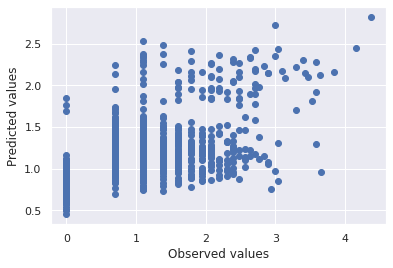

In [25]:
#graphique
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred)
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.show()

ridge regression (eviter coef a zero)

# typologie

In [0]:
from scipy.spatial.distance import cdist
# ACP sur les var numériques
# l'ACP doit être appliqué sur des données standardisées
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [16]:
pca_Digitalization=PCA(n_components=10).fit(X_scaled)
CP_Digitalization = pca_Digitalization.transform(X_scaled)

pca_Digitalization.explained_variance_ratio_ # 6 composantes expliquent 80% de la variance des données
                                   
resuts_pca=pca_Digitalization.explained_variance_ratio_

print(pca_Digitalization.explained_variance_ratio_)


[0.17963618 0.13635774 0.10491495 0.10252283 0.09890273 0.09717093
 0.09087259 0.07315065 0.0702362  0.04623521]


In [72]:
print(CP_Digitalization)

[[ 1.56611117 -0.14972685  0.12707668  1.68788223  0.38962195  1.77244772]
 [-0.99162863  0.65222105 -0.40169632 -0.78542318 -0.89905975  0.36789682]
 [-1.74474433  0.98047921  1.06366807  0.39547496  3.46314444 -1.1008928 ]
 ...
 [-1.61433161  1.5456566  -1.34758323 -1.6148285   0.15342624  0.50027517]
 [-1.18433667  1.41194705 -1.50963922 -0.34894465  0.47814401 -0.3158954 ]
 [-0.42451406  0.34159896 -0.52708439 -0.31548071  0.41627804 -0.75877299]]


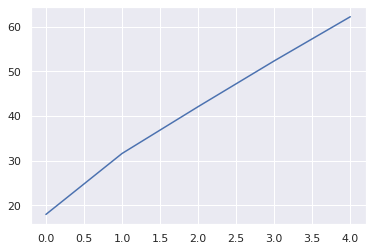

In [31]:
np.cumsum(np.round(pca_Digitalization.explained_variance_ratio_, decimals=4)*100)
plt.plot(np.cumsum(np.round(pca_Digitalization.explained_variance_ratio_, decimals=4)*100))
# les coordonnées des individus sur les deux axes
# ce nous qui disons qu le colonnes se appelent cp 1 et CP2

axes=pd.DataFrame(CP_Digitalization[:,0:5], columns = ['CP1', 'CP2','CP3','CP4','CP5'])

# examine l'objet
pca_Digitalization.__dict__
from math import sqrt 
list(map(lambda x:(x**2)/149,np.array(pca_Digitalization.singular_values_)))
# valeur propre λi=si**2/(n−1)
import seaborn as sns
finalDf = pd.concat([axes, analysis], axis=1)




In [32]:
print(axes)

           CP1       CP2       CP3       CP4       CP5
0     1.451381 -0.509556 -1.379848  1.322403 -0.446785
1    -0.978361  0.638918  0.186086 -0.936913  0.687243
2    -1.632975  0.876824  0.931408  1.245465 -3.037314
3     0.482501  0.103020 -0.759056 -1.182038  1.551192
4     0.598681 -1.475799  0.140808  1.470287  0.182084
...        ...       ...       ...       ...       ...
8333  2.941413  2.512753  1.250428 -0.527843  0.391670
8334 -0.751872  0.501521 -0.157298  0.557650  0.477574
8335 -0.688700  0.033000 -0.082404 -0.009959 -1.087071
8336 -0.250939 -0.137226 -0.073667 -1.189664 -0.419889
8337 -0.755334  0.459395 -0.530885  0.643748 -0.266112

[8338 rows x 5 columns]


In [33]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
distorsions=[]
choice = pd.DataFrame(columns = ['clusters','calinski','silhouette'])
for i in range(3,9) :
    k_means = KMeans(n_clusters = i)
    k_means.fit(CP_Digitalization[:,0:10])
    choice.loc[i, 'clusters'] = i
    distorsions.append(sum(np.min(cdist(CP_Digitalization[:,0:10], k_means.cluster_centers_, 'euclidean'), axis=1)) / CP_Digitalization[:,0:10].shape[0])

    choice.loc[i, 'calinski'] = metrics.calinski_harabaz_score(CP_Digitalization[:,0:10], k_means.labels_)
    choice.loc[i, 'silhouette'] = metrics.silhouette_score(CP_Digitalization[:,0:10], k_means.labels_, metric='euclidean')
print(choice) 



  clusters calinski silhouette
3        3  2118.35    0.20306
4        4   1867.1   0.187789
5        5  1699.69   0.168252
6        6  1619.01   0.171031
7        7  1530.83    0.16932
8        8  1481.12   0.180334


In [35]:
pca_Digitalization=PCA(n_components=5).fit(X_scaled)
CP_Digitalization = pca_Digitalization.transform(X_scaled)

pca_Digitalization.explained_variance_ratio_ # 5 composantes expliquent 70% de la variance des données
                                     
resuts_pca=pca_Digitalization.explained_variance_ratio_

print(pca_Digitalization.explained_variance_ratio_)


[0.17963618 0.13635774 0.10491495 0.10252283 0.09890273]


In [0]:
# créer 3 groupes de valeur des logements <15 , 15-25 et 25+
finalDf["Class_Presciption"] = 'big'
finalDf.loc[df['prescription'] <= 5, 'Class_Presciption'] = 'medium'
finalDf.loc[df['prescription'] <= 2, 'Class_Presciption'] = 'small'
finalDf.loc[df['prescription'] <1, 'Class_Presciption'] = 'zero'

In [29]:
print(finalDf)

           CP1       CP2  ...  prescription  Class_Presciption
0     1.451381 -0.509556  ...           3.0             medium
1    -0.978361  0.638918  ...           2.0              small
2    -1.632975  0.876824  ...           2.0              small
3     0.482501  0.103020  ...           4.0             medium
4     0.598681 -1.475799  ...           5.0             medium
...        ...       ...  ...           ...                ...
8333  2.941413  2.512753  ...          21.0                big
8334 -0.751872  0.501521  ...           1.0              small
8335 -0.688700  0.033000  ...           3.0             medium
8336 -0.250939 -0.137226  ...           9.0                big
8337 -0.755334  0.459395  ...           1.0              small

[8338 rows x 17 columns]


In [91]:
finalDf.head()

,CP1,CP2,CP3,CP4,CP5,f2f,email_open,conference,webinar,customer_id_y,office_or_hospital_based,gender,is_cardiologist,Class_exp_doc,recency_pres,prescription,Class_Presciption
0,1.566111,-0.149727,0.127077,1.687882,0.389622,70.0,10.0,2.0,9.0,91.0,1,0,0,2,3,3.0,medium
1,-0.991629,0.652221,-0.401696,-0.785423,-0.899060,8.0,15.0,2.0,0.0,78.0,1,1,0,2,1,2.0,small
2,-1.744744,0.980479,1.063668,0.395475,3.463144,0.0,3.0,0.0,0.0,360.0,0,0,0,2,2,2.0,small
3,0.463669,0.238305,-1.150912,-0.288540,-1.772081,55.0,16.0,2.0,0.0,33.0,1,1,0,2,2,4.0,medium
4,0.592084,-1.382822,1.273572,0.885814,0.034292,35.0,12.0,0.0,3.0,91.0,1,0,0,4,2,5.0,medium


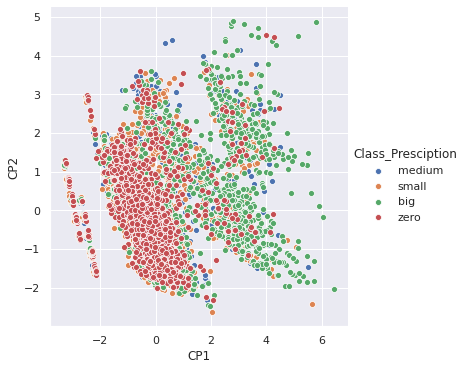

In [36]:
sns.pairplot(x_vars='CP1', y_vars='CP2', data=finalDf, hue="Class_Presciption", size=5)

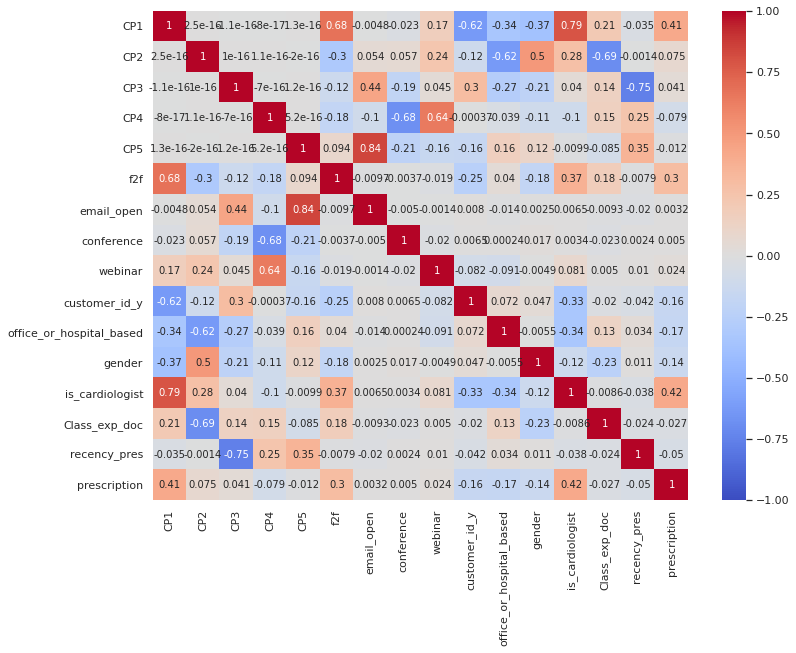

In [23]:
# 7 valeurs propres >1
corr=finalDf.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.index.values, vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", annot = True)


creating typologie

In [24]:

###########################################################################################
# Clustering
###########################################################################################
from sklearn.cluster import KMeans
from sklearn import metrics
#Cet algorithme étant aléatoire, on initialise la graine (avec random_state). 
# On choisit le classifieur à utiliser avec notamment le nombre de clusters à utiliser
k_means = KMeans(n_clusters = 5)
k_means.fit(CP_Digitalization[:,0:5])
k_means.inertia_ #Sum of squared distances of samples to their closest cluster center.

# somme des distances de chacun à son barycentre gagnant / n
sum(np.min(cdist(CP_Digitalization[:,0:5], k_means.cluster_centers_, 'euclidean'), axis=1)) / CP_Digitalization[:,0:5].shape[0]

# On regarde le cluster qui est assigné à chaque observation
pd.DataFrame(k_means.labels_, columns = ['Cluster']).head()



,Cluster
0,1
1,2
2,2
3,4
4,1


In [120]:
print(CP_Digitalization)

[[ 1.56611117 -0.14972685  0.12707668  1.68788223  0.38962195]
 [-0.99162863  0.65222105 -0.40169632 -0.78542318 -0.89905975]
 [-1.74474433  0.98047921  1.06366807  0.39547496  3.46314444]
 ...
 [-1.61433161  1.5456566  -1.34758323 -1.6148285   0.15342624]
 [-1.18433667  1.41194705 -1.50963922 -0.34894465  0.47814401]
 [-0.42451406  0.34159896 -0.52708439 -0.31548071  0.41627804]]


In [96]:
pd.DataFrame(k_means.labels_)[0].value_counts().apply(lambda x:x/len(k_means.labels_))

1    0.342753
0    0.246772
3    0.239464
2    0.092083
4    0.078928
Name: 0, dtype: float64

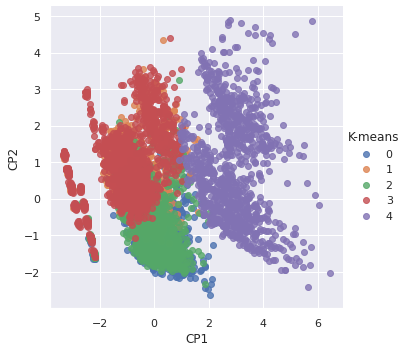

In [37]:

# On choisit 6 clusters et on sauvegarde les résultats dans la matrice cluster
k_means = KMeans(n_clusters = 5).fit(CP_Digitalization[:,0:5])

typologie = pd.concat([finalDf, pd.DataFrame(k_means.labels_, columns = ['K-means'])], axis = 1)

# On peut construire une représentation des points dans le plan principal des variables 
#(acp sur les 4 var, et on récupère les 2 premieres composantes)

sns.lmplot('CP1','CP2', data = typologie, hue = 'K-means', fit_reg=False)


In [38]:
typologie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8338 entries, 0 to 8337
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CP1                       8338 non-null   float64
 1   CP2                       8338 non-null   float64
 2   CP3                       8338 non-null   float64
 3   CP4                       8338 non-null   float64
 4   CP5                       8338 non-null   float64
 5   f2f                       8338 non-null   float64
 6   email_open                8338 non-null   float64
 7   conference                8338 non-null   float64
 8   webinar                   8338 non-null   float64
 9   customer_id_y             8338 non-null   float64
 10  office_or_hospital_based  8338 non-null   int64  
 11  gender                    8338 non-null   int64  
 12  is_cardiologist           8338 non-null   int64  
 13  Class_exp_doc             8338 non-null   int64  
 14  recency_

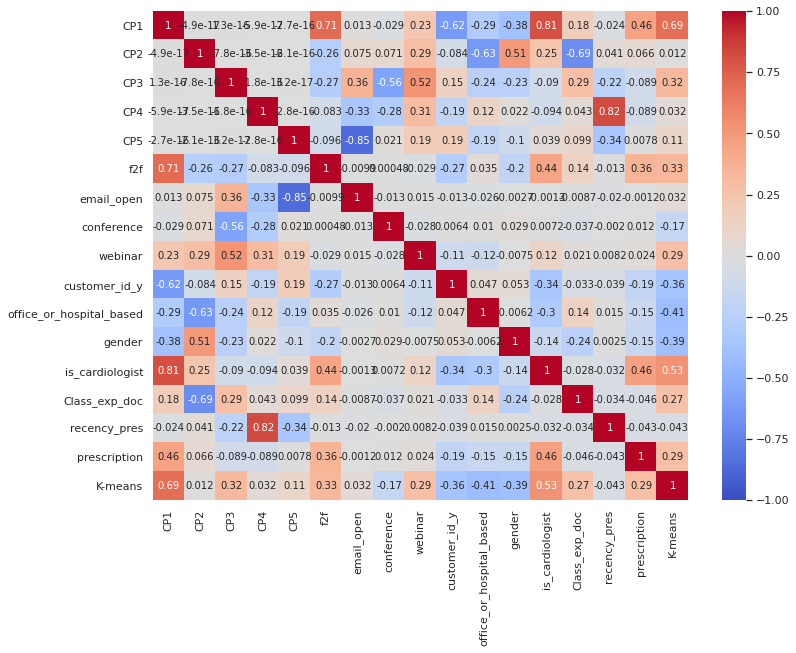

In [99]:
# 7 valeurs propres >1
corr=typologie.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.index.values, vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", annot = True)


In [98]:
#proportion de valeur inmo dans chaque luster
pd.crosstab(typologie['K-means'],typologie['Class_Presciption'], normalize=True)

Class_Presciption,big,medium,small,zero
K-means,,,,
0,0.046041,0.063094,0.064068,0.082582
1,0.016565,0.065773,0.156638,0.000000
2,0.078197,0.086480,0.075274,0.096711
3,0.058952,0.013398,0.013398,0.006090
4,0.029720,0.017540,0.021194,0.008283


In [0]:
typologie.to_csv('/content/final_typologie.csv')

In [106]:
typologie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CP1                       4105 non-null   float64
 1   CP2                       4105 non-null   float64
 2   CP3                       4105 non-null   float64
 3   CP4                       4105 non-null   float64
 4   CP5                       4105 non-null   float64
 5   f2f                       4105 non-null   float64
 6   email_open                4105 non-null   float64
 7   conference                4105 non-null   float64
 8   webinar                   4105 non-null   float64
 9   customer_id_y             4105 non-null   float64
 10  office_or_hospital_based  4105 non-null   int64  
 11  gender                    4105 non-null   int64  
 12  is_cardiologist           4105 non-null   int64  
 13  Class_exp_doc             4105 non-null   int64  
 14  recency_

# linear regression with cluster

In [108]:
regression=typologie[typologie['K-means']==0]
regression.head()


,CP1,CP2,CP3,CP4,CP5,f2f,email_open,conference,webinar,customer_id_y,office_or_hospital_based,gender,is_cardiologist,Class_exp_doc,recency_pres,prescription,Class_Presciption,K-means
1,-0.991629,0.652221,-0.401696,-0.785423,-0.899060,8.0,15.0,2.0,0.0,78.0,1,1,0,2,1,2.0,small,0
2,-1.744744,0.980479,1.063668,0.395475,3.463144,0.0,3.0,0.0,0.0,360.0,0,0,0,2,2,2.0,small,0
8,0.095557,0.418613,-0.448401,-0.769114,0.062547,54.0,11.0,0.0,0.0,78.0,1,1,0,1,0,0.0,zero,0
9,-0.790920,-0.306949,-1.004914,-0.067700,0.451897,7.0,10.0,3.0,0.0,126.0,1,0,0,2,2,6.0,big,0
13,-0.768528,-0.466679,-0.749424,-0.089344,1.726181,7.0,6.0,2.0,0.0,126.0,1,0,0,2,1,7.0,big,0


In [0]:
y= np.log1p(f['prescription'])
regression=typologie.drop(['prescription','Class_Presciption','K-means','CP1','CP2','CP3','CP4','CP5'],axis=1)

In [111]:
from scipy.spatial.distance import cdist
# ACP sur les var numériques
# l'ACP doit être appliqué sur des données standardisées
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing



Z = f.select_dtypes(include=[object,bool])
# prescription est plus une variable qu'on veut projetter
X = f.drop(['prescription','Class_Presciption'],axis=1)
#Z = pd.concat([Z,df["K-means"]] ,axis=1)



# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
Z = X.select_dtypes(include=[object,bool]).apply(le.fit_transform)
Z.head()
X=X.drop(X.select_dtypes(include=[object,bool]),axis=1)
X=X.drop(["years_since_graduation"],axis=1)

X.head()


,f2f,email_open,conference,webinar,customer_id_y
0,70.0,10.0,2.0,9.0,91.0
1,8.0,15.0,2.0,0.0,78.0
2,0.0,3.0,0.0,0.0,360.0
3,55.0,16.0,2.0,0.0,33.0
4,35.0,12.0,0.0,3.0,91.0


In [112]:
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
f2f,0.225792
email_open,-0.010749
conference,0.002144
webinar,0.026214
customer_id_y,-0.104603


In [0]:
y_pred = regressor.predict(X_test)

In [114]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard Errors  t values  Probabilities
0        1.1281            0.057    19.820          0.000
1        0.0111            0.001    17.360          0.000
2       -0.0015            0.004    -0.392          0.695
3        0.0055            0.012     0.471          0.638
4        0.0094            0.005     1.983          0.047
5       -0.0014            0.000    -7.320          0.000


In [116]:
predictions = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
predictions.head(25)
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
from sklearn.metrics import r2_score
print('Rquare:', r2_score(Y_test, y_pred))


Mean Absolute Error: 0.6333571469900746
Mean Squared Error: 0.6230644548144173
Root Mean Squared Error: 0.7893443195554253
Rquare: 0.10817968191851468


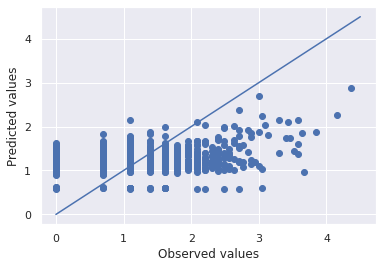

In [117]:
#graphique
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred)
plt.plot(np.arange(0,5,0.5),np.arange(0,5,0.5))
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.show()

# regression with cluster

In [270]:
cols = ['prescription_total_12', 'prescription_total_09','prescription_total_06','prescription_total_03',  'prescription',	'f2f','email_open',	'conference', 'webinar', 'office_or_hospital_based',	'gender',	'is_cardiologist', 'years_since_graduation','dig_interaction_tot',	'digital_class', 'class_interaction_tot', 'Rep_class',	'Class_Presciption',	'Class_exp_doc', 'K-means']
f = df[cols]

f["recency_pres"] = '5.none'

f.loc[df['prescription_total_12'] >= 1, "recency_pres"] = '1.recent'
df.loc[df['prescription_total_09'] >= 1, "recency_pres"] = '2.less_recent'
f.loc[df['prescription_total_06'] >= 1, "recency_pres"] = '3.even_less_recent'
f.loc[df['prescription_total_03'] >= 1, "recency_pres"] = '4.not_very_recent'
f=f.drop(['prescription_total_12','prescription_total_09','prescription_total_06','prescription_total_03'],axis=1)

f.head()

#old=f.loc[f['K-means'] == '1']
#head(old)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: ignored

# constraints

# stats

In [46]:
eng = pd.read_csv('/content/engagement (5).csv')
eng.columns.str.replace(' ','')
eng.head()

,Unnamed: 0,id,customer_id,rep_id,conference_total_01,conference_total_02,conference_total_03,conference_total_04,conference_total_05,conference_total_06,conference_total_07,conference_total_08,conference_total_09,conference_total_10,conference_total_11,conference_total_12,email_open_total_01,email_open_total_02,email_open_total_03,email_open_total_04,email_open_total_05,email_open_total_06,email_open_total_07,email_open_total_08,email_open_total_09,email_open_total_10,email_open_total_11,email_open_total_12,f2f_total_01,f2f_total_02,f2f_total_03,f2f_total_04,f2f_total_05,f2f_total_06,f2f_total_07,f2f_total_08,f2f_total_09,f2f_total_10,f2f_total_11,f2f_total_12,...,f2f6,f2f6_bin,f2f9,f2f9_bin,f2f12,f2f12_bin,email_open3,email_open3_bin,email_open6,email_open6_bin,email_open9,email_open9_bin,email_open12,email_open12_bin,interaction3_bin,interaction3,interaction6_bin,interaction6,interaction9_bin,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,Vol_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Nb_doctor
0,0,0,100,100,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,3,0,1,0,0,3,1,1,4,2,4,8,8,6,4,7,9,10,8,0,...,22,1,20,1,26,1,1,1,3,1,1,1,3,1,1,11,1,28,1,28,1,35,1,1,1,5,1,7,1,8,128,64,32,2,560,224,112,11,1133,1
1,1,1,101,101,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,4,2,0,0,0,2,2,2,1,1,0,0,1,1,2,1,1,0,0,1,0,...,4,1,2,1,1,1,2,1,6,1,2,1,4,1,1,3,1,11,1,5,1,6,1,2,1,6,1,2,1,4,96,48,24,2,96,40,44,3,353,1
2,3,3,103,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,1,2,1,1,0,0,0,0,1,2,1,1,32,16,0,0,16,16,0,0,80,1
3,4,4,104,103,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,1,2,1,2,1,1,2,2,3,2,3,3,6,6,7,5,7,6,7,0,...,15,1,19,1,18,1,1,1,6,1,4,1,4,1,1,10,1,21,1,23,1,22,1,1,1,6,1,4,1,4,64,32,16,3,352,184,84,10,745,1
4,5,5,105,100,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,1,0,2,0,2,2,2,2,3,3,4,4,4,4,2,3,4,0,...,11,1,10,1,9,1,5,1,0,0,3,1,2,1,1,13,1,13,1,13,1,11,1,6,1,2,1,3,1,2,64,32,16,3,176,104,52,13,460,1


In [53]:
stats=pd.concat([eng,typologie['K-means']] ,axis=1)
stats["Engagement_group"]='3.cold'
stats.loc[stats["Engagement_index"]>250, "Engagement_group"] = '2.Average'
stats.loc[stats["Engagement_index"]>650, "Engagement_group"] = '1.Engaged'
stats.tail()

,Unnamed: 0,id,customer_id,rep_id,conference_total_01,conference_total_02,conference_total_03,conference_total_04,conference_total_05,conference_total_06,conference_total_07,conference_total_08,conference_total_09,conference_total_10,conference_total_11,conference_total_12,email_open_total_01,email_open_total_02,email_open_total_03,email_open_total_04,email_open_total_05,email_open_total_06,email_open_total_07,email_open_total_08,email_open_total_09,email_open_total_10,email_open_total_11,email_open_total_12,f2f_total_01,f2f_total_02,f2f_total_03,f2f_total_04,f2f_total_05,f2f_total_06,f2f_total_07,f2f_total_08,f2f_total_09,f2f_total_10,f2f_total_11,f2f_total_12,...,f2f9,f2f9_bin,f2f12,f2f12_bin,email_open3,email_open3_bin,email_open6,email_open6_bin,email_open9,email_open9_bin,email_open12,email_open12_bin,interaction3_bin,interaction3,interaction6_bin,interaction6,interaction9_bin,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,Vol_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Nb_doctor,K-means,Engagement_group
8333,8344,8344,8444,160,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,4,2,1,2,1,2,0,0,0,0,0,0,0,1,1,2,1,4,5,7,0,...,7,1,10,1,3,1,7,1,5,1,3,1,1,3,1,9,1,12,1,14,1,3,1,7,1,5,1,3,96,32,16,1,224,96,36,3,504,1,4,2.Average
8334,8345,8345,8445,123,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,3,2,0,1,2,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,...,3,1,3,1,3,1,5,1,3,1,3,1,1,3,1,8,1,6,1,6,1,3,1,5,1,3,1,3,64,32,16,1,96,48,32,3,292,1,1,2.Average
8335,8346,8346,8446,116,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,3,2,0,0,0,0,0,0,1,1,1,2,2,0,...,3,1,4,1,0,0,1,1,2,1,0,0,0,0,1,1,1,6,1,5,0,0,1,1,1,2,0,0,64,48,8,0,80,48,4,0,252,1,3,2.Average
8336,8347,8347,8447,152,1,1,0,1,0,0,0,0,0,0,0,0,0,2,1,1,2,1,0,0,1,1,1,2,0,0,0,0,0,0,1,1,1,0,0,0,...,3,1,2,1,3,1,4,1,1,1,2,1,1,5,1,5,1,4,1,4,1,3,1,4,1,1,1,2,64,32,16,2,64,32,20,5,235,1,3,3.cold
8337,8348,8348,8448,115,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,3,4,0,...,1,1,4,1,4,1,3,1,1,1,1,1,1,4,1,3,1,2,1,5,1,4,1,3,1,1,1,1,64,32,8,1,80,16,12,4,217,1,1,3.cold


In [0]:
#graphique
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred)
plt.plot(np.arange(0,5,0.5),np.arange(0,5,0.5))
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.show()

In [0]:
stats.to_csv('/content/stats.csv')

In [0]:
df = pd.concat([df,typology['K-means']] ,axis=1)

In [11]:
#proportion de valeur inmo dans chaque luster
#pd.crosstab(df["K-means"],df["recency_pres"], normalize=True)

df[["prescription","f2f","webinar","email_open", "conference","office_or_hospital_based",	"gender",	"is_cardiologist"]].groupby(df['Class_exp_doc']).mean()
#df["Class_exp_doc"] = '5.super high'
#df.loc[df["years_since_graduation"] <40,'Class_exp_doc'] = '4.high'
#df.loc[df["years_since_graduation"] <30,'Class_exp_doc'] = '3.medium high'
#df.loc[df["years_since_graduation"] <= 20,'Class_exp_doc'] = '2.medium low'
#df.loc[df["years_since_graduation"] <= 10,'Class_exp_doc'] = '1.little'

,prescription,f2f,webinar,email_open,conference
Class_exp_doc,,,,,
1.little,3.501000,15.106000,0.883000,12.059000,1.246000
2.medium low,4.976909,20.233274,1.128478,11.936057,1.229130
3.medium high,4.457097,23.450081,0.835942,11.966541,1.212628
4.high,3.964564,24.554451,1.022904,11.891530,1.179343
5.super high,3.757085,27.452767,1.019568,11.944669,1.173414


In [0]:
#proportion de valeur inmo dans chaque luster
#pd.crosstab(df["K-means"],df["recency_pres"], normalize=True)

df[["prescription","f2f","webinar","email_open", "conference","office_or_hospital_based",	"gender",	"is_cardiologist"]].groupby(df['Class_exp_doc']).mean()
#df["Class_exp_doc"] = '5.super high'
#df.loc[df["years_since_graduation"] <40,'Class_exp_doc'] = '4.high'
#df.loc[df["years_since_graduation"] <30,'Class_exp_doc'] = '3.medium high'
#df.loc[df["years_since_graduation"] <= 20,'Class_exp_doc'] = '2.medium low'
#df.loc[df["years_since_graduation"] <= 10,'Class_exp_doc'] = '1.little'

In [10]:
df.head()

,Unnamed: 0,prescription_total_03,prescription_total_06,prescription_total_09,prescription_total_12,webinar_total_01,webinar_total_02,webinar_total_03,webinar_total_04,webinar_total_05,webinar_total_06,webinar_total_07,webinar_total_08,webinar_total_09,webinar_total_10,webinar_total_11,webinar_total_12,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,webinar,prescription,f2f,email_open,conference,webinar3,webinar3_bin,webinar6,webinar6_bin,webinar9,webinar9_bin,webinar12,webinar12_bin,conference3_bin,conference6_bin,conference9_bin,conference12_bin,f2f3_bin,...,interaction3_bin,interaction3,interaction6_bin,interaction6,interaction9_bin,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,nb_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Vol_interac_12,quantile_eng,Engagement_group,dig_interaction_tot_bin,dig_interaction_tot,interaction_tot_bin,interaction_tot,customer_id_y,Rep_class,Class_Presciption,Class_exp_doc,f2f3,f2f6,f2f9,f2f12
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,Office,False,False,True,23.0,9.0,3.0,70.0,10.0,2.0,0.0,0.0,2.0,1.0,6.0,1.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,11.0,1.0,28.0,1.0,28.0,1.0,35.0,1.0,1.0,1.0,5.0,1.0,7.0,1.0,8.0,128.0,64.0,32.0,8.0,560.0,224.0,112.0,11.0,1139.0,560.0,"(974.0, 1861.0]",1.Engaged,False,21.0,False,102.0,91.0,1.big,medium,3.medium high,10,22,20,26
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,2.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,11.0,1.0,5.0,1.0,6.0,1.0,2.0,1.0,6.0,1.0,2.0,1.0,4.0,96.0,48.0,24.0,8.0,96.0,40.0,44.0,3.0,359.0,96.0,"(356.0, 361.0]",2.Average,False,14.0,False,25.0,78.0,2.medium big,small,3.medium high,1,4,2,1
2,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hospital,False,False,True,22.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,32.0,16.0,0.0,0.0,16.0,16.0,0.0,0.0,80.0,16.0,"(24.0, 102.0]",3.cold,False,3.0,False,3.0,360.0,1.big,small,3.medium high,4,5,14,10
3,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,4.0,55.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,10.0,1.0,21.0,1.0,23.0,1.0,22.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,4.0,64.0,32.0,16.0,12.0,352.0,184.0,84.0,10.0,754.0,352.0,"(742.0, 782.0]",1.Engaged,False,15.0,False,76.0,33.0,3.medium small,medium,3.medium high,0,0,0,0
4,4.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,False,False,True,44.0,3.0,5.0,35.0,12.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,13.0,1.0,13.0,1.0,13.0,1.0,11.0,1.0,6.0,1.0,2.0,1.0,3.0,1.0,2.0,64.0,32.0,16.0,12.0,176.0,104.0,52.0,13.0,469.0,176.0,"(467.0, 473.0]",2.Average,False,13.0,False,50.0,91.0,1.big,medium,5.super high,8,15,19,18


In [6]:
df.head()

,Unnamed: 0,prescription_total_03,prescription_total_06,prescription_total_09,prescription_total_12,webinar_total_01,webinar_total_02,webinar_total_03,webinar_total_04,webinar_total_05,webinar_total_06,webinar_total_07,webinar_total_08,webinar_total_09,webinar_total_10,webinar_total_11,webinar_total_12,office_or_hospital_based,gender,is_cardiologist,is_gp,years_since_graduation,webinar,prescription,f2f,email_open,conference,webinar3,webinar3_bin,webinar6,webinar6_bin,webinar9,webinar9_bin,webinar12,webinar12_bin,conference3_bin,conference6_bin,conference9_bin,conference12_bin,f2f3_bin,...,interaction3_bin,interaction3,interaction6_bin,interaction6,interaction9_bin,interaction9,interaction12_bin,interaction12,dig_interaction3_bin,dig_interaction3,dig_interaction6_bin,dig_interaction6,dig_interaction9_bin,dig_interaction9,dig_interaction12_bin,dig_interaction12,Diff_interac_12,Diff_interac_9,Diff_interac_6,Diff_interac_3,nb_interac_12,Vol_interac_9,Vol_interac_6,Vol_interac_3,Engagement_index,Vol_interac_12,quantile_eng,Engagement_group,dig_interaction_tot_bin,dig_interaction_tot,interaction_tot_bin,interaction_tot,customer_id_y,Rep_class,Class_Presciption,Class_exp_doc,f2f3,f2f6,f2f9,f2f12
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,Office,False,False,True,23.0,9.0,3.0,70.0,10.0,2.0,0.0,0.0,2.0,1.0,6.0,1.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,11.0,1.0,28.0,1.0,28.0,1.0,35.0,1.0,1.0,1.0,5.0,1.0,7.0,1.0,8.0,128.0,64.0,32.0,8.0,560.0,224.0,112.0,11.0,1139.0,560.0,"(974.0, 1861.0]",1.Engaged,False,21.0,False,102.0,91.0,1.big,medium,3.medium high,10,22,20,26
1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,2.0,8.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,11.0,1.0,5.0,1.0,6.0,1.0,2.0,1.0,6.0,1.0,2.0,1.0,4.0,96.0,48.0,24.0,8.0,96.0,40.0,44.0,3.0,359.0,96.0,"(356.0, 361.0]",2.Average,False,14.0,False,25.0,78.0,2.medium big,small,3.medium high,1,4,2,1
2,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hospital,False,False,True,22.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,32.0,16.0,0.0,0.0,16.0,16.0,0.0,0.0,80.0,16.0,"(24.0, 102.0]",3.cold,False,3.0,False,3.0,360.0,1.big,small,3.medium high,4,5,14,10
3,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,True,False,True,27.0,0.0,4.0,55.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,10.0,1.0,21.0,1.0,23.0,1.0,22.0,1.0,1.0,1.0,6.0,1.0,4.0,1.0,4.0,64.0,32.0,16.0,12.0,352.0,184.0,84.0,10.0,754.0,352.0,"(742.0, 782.0]",1.Engaged,False,15.0,False,76.0,33.0,3.medium small,medium,3.medium high,0,0,0,0
4,4.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Office,False,False,True,44.0,3.0,5.0,35.0,12.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,13.0,1.0,13.0,1.0,13.0,1.0,11.0,1.0,6.0,1.0,2.0,1.0,3.0,1.0,2.0,64.0,32.0,16.0,12.0,176.0,104.0,52.0,13.0,469.0,176.0,"(467.0, 473.0]",2.Average,False,13.0,False,50.0,91.0,1.big,medium,5.super high,8,15,19,18
